# Homework 10: Problems
### ASTR-324, Spring 2017, Ivezic & Juric, University of Washington
https://github.com/uw-astr-324-s17/astr-324-s17


## Problem 1: Unsupervised classification using Gausian Mixture Model

GMM applied to 4-D data for variable stars from the SDSS and LINEAR surveys:

-- SDSS u-g and g-i colors, 

-- LINEAR variability period (logP) and variability amplitude (A).

For more details, including reading the data, see Homework 1 - this is the same data sample.  

Use the code from [astroML fig. 6.6](http://www.astroml.org/book_figures/chapter6/fig_EM_metallicity.html) 
to search for clusters in the 4-dimensional g-i vs. logP vs. u-g vs. A space. 

Hint: adapt the code we used in notebook for Week 10 (GMM for asteroids)

Assume that there are no more than 30 physical clusters. 

a) plot BIC (and AIC if you want) as a function of the assumed number of clusters; what is the optimal number of clusters?

b) plot logP vs. g-i diagram and overplot ellipses (1.5 sigma level as in fig. 6.6)
outlining each class for the best number of clusters. 

c) what fraction of sample belongs to the most populous cluster (hint: look at gmm\_best.weights_) 


## Problem 2: Your feedback! 

Please answer each question with a few words - you will help us a lot! 

Don't worry about being (too) critical - your critiques are actually the most 
useful feedback to us! 

You can add your text directly below, after each question. 

1) did you find power point slides, or jupyter notebook approach, easier to follow?

2) should we have spent more in-class time on analyzing notebook code line by line? 

3) should we have spent more or less in-class time on discussing theoretical background?

4) were there any topics that could be dropped, or minimized in coverage? 

5) can you think of any additional topics that should have been covered, or discussed
   in more detail? 
   
6) should we have covered more non-astronomical applications (e.g. text processing,
data harvesting from the web)? 
   
7) did you find homeworks useful learning experience?

8) were homeworks too easy, too hard, or just perfect? 

9) do you have any other advice on how to make this class more effective/relevant/interesting? 


   
   








<br>
# Homework 1: Solutions

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture as GMM
from astroML.datasets import fetch_LINEAR_geneva
from astroML.decorators import pickle_results
from astroML.plotting.tools import draw_ellipse

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

In [2]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

## Problem 1

First obtain LINEAR data for 6,146 stars using astroML built-in function: 

In [3]:
data = fetch_LINEAR_geneva()
# N.B. this is a 4-dimensional dataset
ug = data['ug']
gi = data['gi']
logP = data['logP']
A = data['amp']
X = np.vstack([data['gi'], data['logP'], data['ug'], data['amp']]).T

In [41]:
# Compute GMM models & AIC/BIC
N = np.arange(1, 30)
def compute_GMM(N, covariance_type='full', max_iter=100):
    models = [None for n in N]
    for i in range(len(N)):
        models[i] = GMM(n_components=N[i], max_iter=max_iter,
                        covariance_type=covariance_type)
        models[i].fit(X)
    return models

models = compute_GMM(N)
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]
i_best = np.argmin(BIC)
gmm_best = models[i_best]

In [42]:
print "best fit converged:", gmm_best.converged_
print "BIC: n_components =  %i" % N[i_best]

best fit converged: True
BIC: n_components =  23


0 0 0.114928937614
1 22 0.0954387131464
2 19 0.0889896262439
3 6 0.0877124826564
4 17 0.0763198110921
5 3 0.058151693307
6 4 0.0469936608502
7 15 0.046477831914
8 8 0.0444891414714
9 10 0.0443257095603
10 13 0.039299254602
11 18 0.0384165496753
12 7 0.0339308712674
13 21 0.028334599857
14 2 0.0280326643719
15 14 0.0239778525276
16 20 0.0235913773967
17 9 0.0198743209584
18 11 0.0173761637933
19 5 0.0156687893898
20 16 0.014984280655
21 12 0.0121975452937
22 1 0.000488122356004


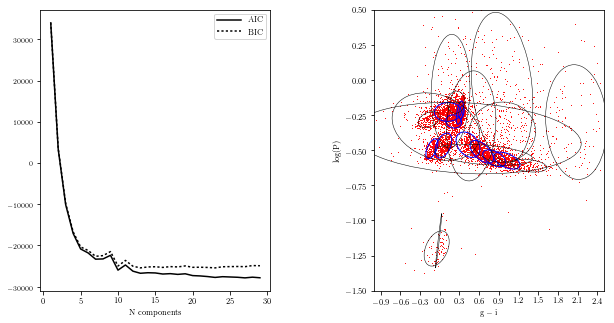

In [43]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(9, 6))
fig.subplots_adjust(wspace=0.45, bottom=0.25, top=0.9, left=0.1, right=0.97)

# plot AIC/BIC
ax = fig.add_subplot(121)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, ':k', label='BIC')
ax.legend(loc=1)
ax.set_xlabel('N components')
plt.setp(ax.get_yticklabels(), fontsize=7)

# plot best configurations for AIC and BIC
ax = fig.add_subplot(122)
ax.scatter(gi, logP, c='red', s=0.9, lw=0)

ind = np.argsort(gmm_best.weights_)[::-1]
for cnt, i in enumerate(ind[:N[i_best]]):
    mu = gmm_best.means_[i]
    C = gmm_best.covariances_[i]
    w = gmm_best.weights_[i]
    print cnt, i, w
    if (cnt<10):
        draw_ellipse(mu, C, scales=[1.5], ax=ax, fc='none', lw=1.0, ec='blue')
    else:
        draw_ellipse(mu, C, scales=[1.5], ax=ax, fc='none', lw=0.5, ec='k')
 

ax.set_ylim(-1.5, 0.5)
ax.set_xlim(-1.0, 2.5)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.3))
ax.set_xlabel(r'$\rm g-i$')
ax.set_ylabel(r'$\rm log(P)$')

plt.show()